# Project: NLP - Twitter US Airline Sentiment

# **Background and Context:**

Twitter possesses 330 million monthly active users, which allows businesses to reach a broad population and connect with customers without intermediaries. On the other hand, there’s so much information that it’s difficult for brands to quickly detect negative social mentions that could harm their business.

That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.


Listening to how customers feel about the product/service on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand and their competitors, and discover new trends in the industry.

# **Data Description:**

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

# **Dataset:**

The dataset has the following columns:

- tweet_id                                                           
- airline_sentiment                                               
- airline_sentiment_confidence                               
- negativereason                                                   
- negativereason_confidence                                    
- airline                                                                    
- airline_sentiment_gold                                              
- name     
- negativereason_gold 
- retweet_count
- text
- tweet_coord
- tweet_created
- tweet_location 
- user_timezone

# **Objective:**

To implement the techniques learned as a part of the course.

## Index

- <a href = #link1>1. Data Summary. (4 marks) </a>


- <a href = #link2>2. Exploratory data analysis. (9 marks) </a> 


- <a href = #link3>3. Understanding of Data Columns. (3 marks) </a>


- <a href = #link4>4. Data Pre-processing (12 marks) </a> 


- <a href = #link5>5. Vectorization. (8 marks) </a>


- <a href = #link6>6. Modelling , tuning and Evaluation. (14 marks) </a>


- <a href = #link7>7. Conclusion (6 marks) </a>


- <a href = #link8>8. Overall Structure and flow ofNotebook (4 marks) </a>

## <a id = "link1"></a> 1. Data Summary - Add your view and opinion along with the problem statement, shape of the data, and data description. (4 marks)

In [1]:
# Checking working directory
import os
cwd = os.getcwd()
print (cwd)

C:\Users\bradr\Dropbox\AIML Py\My Projects


**Import libraries**

In [2]:
# Importing required libraries
import numpy as np   
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from bs4 import BeautifulSoup
import contractions
import re, string, unicodedata
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import wordcloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bradr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bradr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bradr\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**Load dataset**

In [3]:
# Loading the dataset
data=pd.read_csv("Tweets.csv")

**Print the shape of data**

In [4]:
# Printing the dataset
data.shape

(14640, 15)

The dataset has 14640 rows and 15 columns

In [5]:
# Printing the first five rows
data.head()

tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN              0   
2                    NaN  yvonnalynn                 NaN              0   
3                    NaN    jnardino                 NaN              0   
4                    NaN    jnardino                 NaN              0   

                                                text tweet_coord  \
0                @VirginAmerica What @dhepburn said.         NaN   
1  @VirginAmerica plus you've added commercials t...         NaN   
2  @VirginAmerica I didn't today... Must mean I n...         NaN   
3  @VirginAmerica it's really aggressive to blast...         NaN   
4  @VirginAmerica and it's a really big bad thing...         NaN   

               tweet_created tweet_location               user_timezone  
0  2015-02-24 11:35:52 -0800            NaN  Eastern Time (US & Canada)  
1  2015-02-24 11:15:59 -0800            NaN  Pacific Time (US & Canada)  
2  2015-02-24 11:15:48 -0800      Lets Play  Central Time (US & Canada)  
3  2015-02-24 11:15:36 -0800            NaN  Pacific Time (US & Canada)  
4  2015-02-24 11:14:45 -0800            NaN  Pacific Time (US & Canada)

In [6]:
# Printing the datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

- There are two float64s, two int64s, and eleven object data types for this dataset.

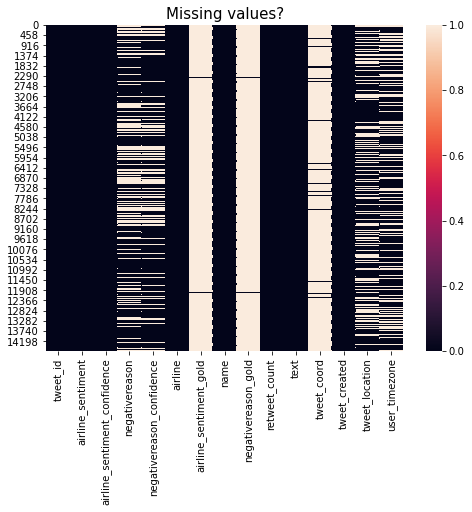

In [7]:
# Printing a visual representation of the mission values
plt.figure(figsize=(8,6))
sns.heatmap(data.isnull())                                  #Visualization of missing value using heatmap
plt.title("Missing values?", fontsize = 15)
plt.show()

- From this visual reference we see that negativereason_gold has nearly 100% missing values and is represented by a near solid tan line.  Whereas tweet_created has zero missing values and is represented by an all black line.  The other fields very in between those two field with varying mix of tan/black.

In [8]:
# Prining a table of the missing values from highest amount to lowest amount
pd.DataFrame(data={'% of Missing Values':round(data.isnull().sum()/data.isnull().count()*100,2)}).sort_values(by='% of Missing Values',ascending=False)

% of Missing Values
negativereason_gold                         99.78
airline_sentiment_gold                      99.73
tweet_coord                                 93.04
negativereason                              37.31
user_timezone                               32.92
tweet_location                              32.33
negativereason_confidence                   28.13
tweet_id                                     0.00
airline_sentiment                            0.00
airline_sentiment_confidence                 0.00
airline                                      0.00
name                                         0.00
retweet_count                                0.00
text                                         0.00
tweet_created                                0.00

- Negativereason_gold, airline_sentiment_gold, Tweet_coord have over 90% of the values empty.  Negativereason, user_timezone, tweet_location, and negativereason_confidence have between 28-37% of values missing.  These numbers are high but the individual datafields are not used later in this project so steps will not be taken to remedy.

In [9]:
# Prining the amount of unique values in the dataset
data.nunique()

tweet_id                        14485
airline_sentiment                   3
airline_sentiment_confidence     1023
negativereason                     10
negativereason_confidence        1410
airline                             6
airline_sentiment_gold              3
name                             7701
negativereason_gold                13
retweet_count                      18
text                            14427
tweet_coord                       832
tweet_created                   14247
tweet_location                   3081
user_timezone                      85
dtype: int64

- A review of the unique values for the dataset has not indicated any areas of concern that require action at this time.

**Data description**

In [10]:
# Printing the description of the data and distribution
data.describe().T

count          mean           std  \
tweet_id                      14640.0  5.692184e+17  7.791112e+14   
airline_sentiment_confidence  14640.0  9.001689e-01  1.628300e-01   
negativereason_confidence     10522.0  6.382983e-01  3.304398e-01   
retweet_count                 14640.0  8.265027e-02  7.457782e-01   

                                       min           25%           50%  \
tweet_id                      5.675883e+17  5.685592e+17  5.694779e+17   
airline_sentiment_confidence  3.350000e-01  6.923000e-01  1.000000e+00   
negativereason_confidence     0.000000e+00  3.606000e-01  6.706000e-01   
retweet_count                 0.000000e+00  0.000000e+00  0.000000e+00   

                                       75%           max  
tweet_id                      5.698905e+17  5.703106e+17  
airline_sentiment_confidence  1.000000e+00  1.000000e+00  
negativereason_confidence     1.000000e+00  1.000000e+00  
retweet_count                 0.000000e+00  4.400000e+01

- tweet_id is relatively well distributed.
- airline_sentiment_confidence is highly right skewed.
- negativereason_confidence is slightly right skewed.
- retweet_count appears to highly left skewed.

## <a id = "link2"></a> 2.	Exploratory data analysis - Plot all (a,b and c) of the graphs that are mentioned in the 2nd section of the problem statement. Mention the observations & insights after plotting each graph.  (9 marks)

In [11]:
# Loading these two variables for processing
Positive_sent = data[data['airline_sentiment']=='positive']
Negative_sent = data[data['airline_sentiment']=='negative']

**Plot the distribution of all tweets among each airline & plot the distribution of sentiment across all the tweets.**

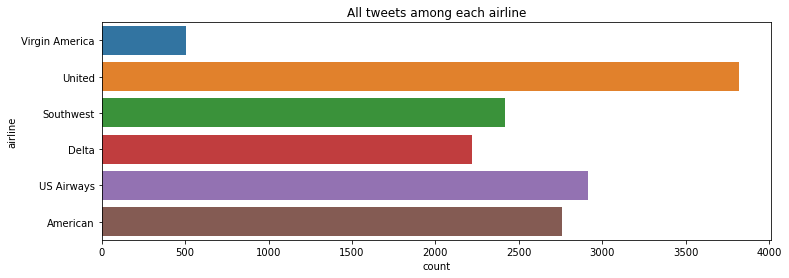

In [12]:
# Printing graphical visualization of all tweets among each airline
countplt, ax = plt.subplots(figsize = (12,4))
plt.title("All tweets among each airline")
ax =sns.countplot(y = 'airline', data=data)

- We can see that United, US Airways, and American were the top three airlines in number of tweets mentioned in.

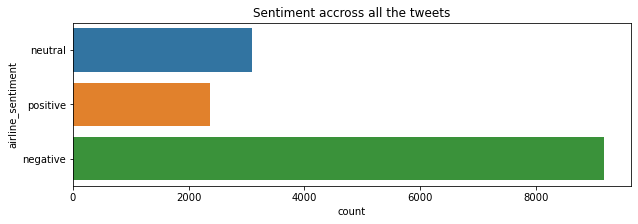

In [13]:
# Printing graphical visualization of sentiment accross all the tweets
countplt, ax = plt.subplots(figsize = (10,3))
plt.title("Sentiment accross all the tweets")
ax =sns.countplot(y = 'airline_sentiment', data=data)

- We see that negative sentiment has the highest count followed by neutral and positive sentiment

**Plot the distribution of Sentiment of tweets for each airline & plot the distribution of all the negative reasons.**

Text(0.5, 1.0, 'Sentiment tweets for each airlilne')

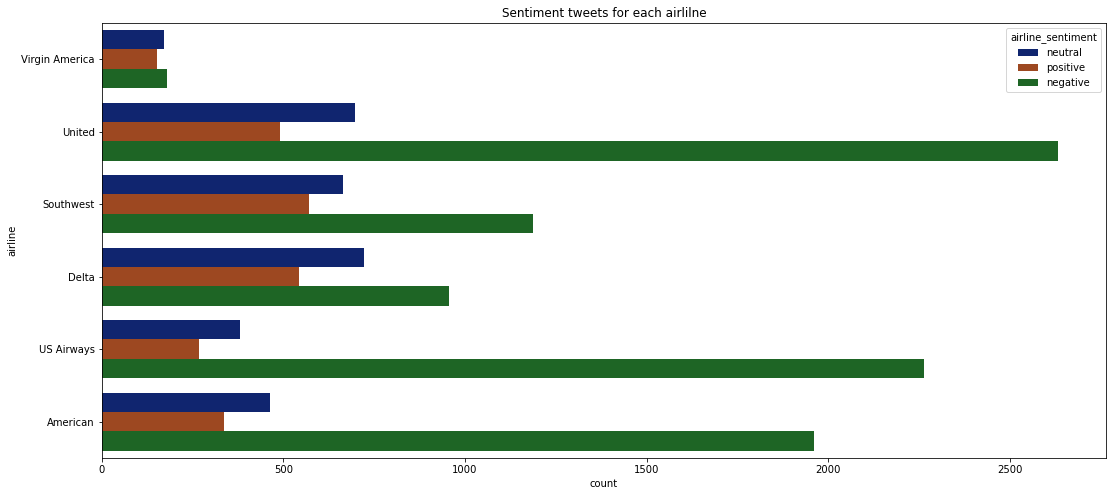

In [14]:
# Printing graphical visualization of sentiment tweets for each airline
countplt, ax = plt.subplots(figsize = (18,8))
ax = sns.countplot(y="airline", hue="airline_sentiment", data=data, palette="dark")
plt.title("Sentiment tweets for each airlilne")

- After reviewing this graphical we can determine that the top three airlines receiving tweets are better defined in this diagram.  Unfortunately, the above menionted top three to receive tweets are all within the negative category.

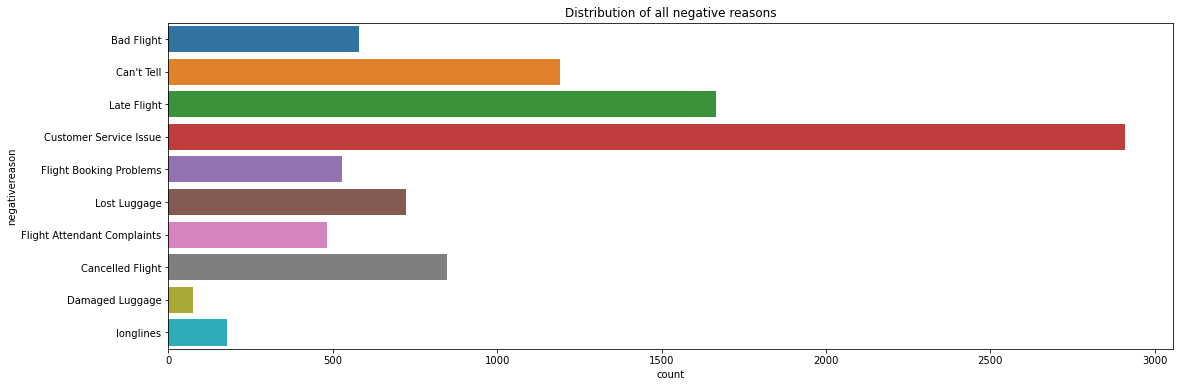

In [15]:
# Printing graphical visualization of distribution of all negative reasons
countplt, ax = plt.subplots(figsize = (18,6))
plt.title("Distribution of all negative reasons")
ax =sns.countplot(y = 'negativereason', data=data)

- Wee see that customer service is the top negative reason closely followed by late flights and cant tell.

**Plot the word cloud graph of tweets for positive and negative sentiment separately.**

In [16]:
# Creating wordcloud
def show_wordcloud(Positive_sent, title):
    text = ' '.join(Positive_sent['text'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='white',
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(14,11), frameon=True)
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=30)
    plt.show()

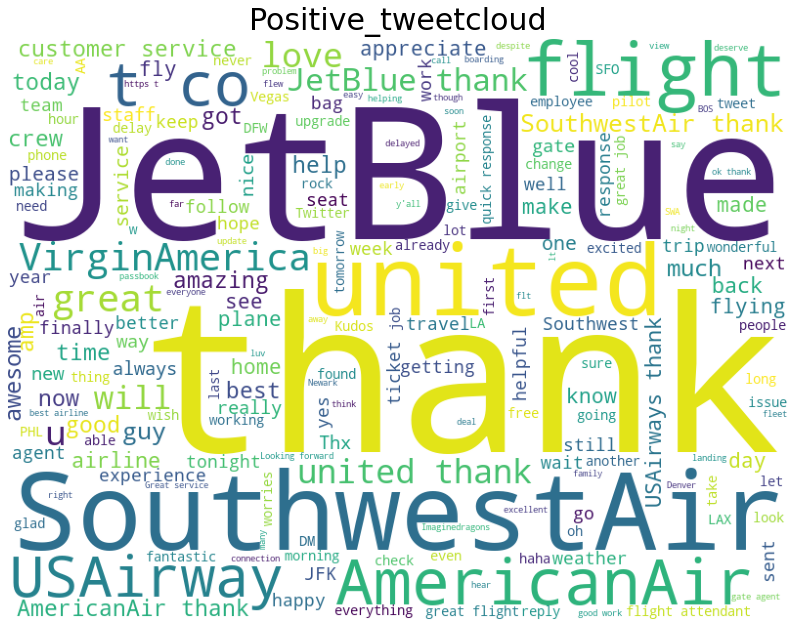

In [17]:
# Printing wordcloud
show_wordcloud(Positive_sent, "Positive_tweetcloud")

- We see that thank and JetBlue appear to have the largest amount of mentioned.  SouthwestAir and united are the third and fourth mentioned.

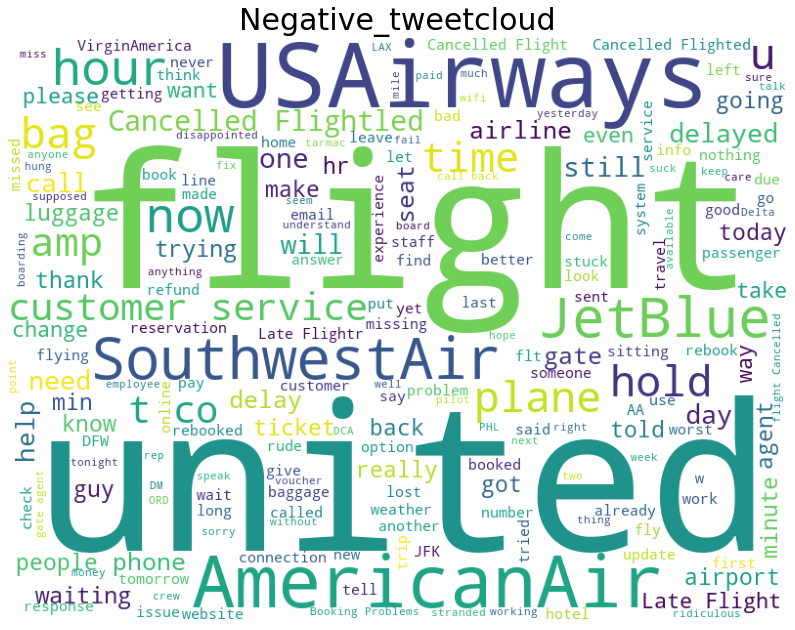

In [18]:
# Printing wordcloud
show_wordcloud(Negative_sent, "Negative_tweetcloud")

- We see that flight and united appear to have the largest amount of mentioned.  USAirways and AmericanAir are the third and fourth mentioned.

## <a id = "link3"></a> 3. Understanding of Data Columns - Drop unnecessary columns, check shape of the data, print 1st few rows of data.  (3 marks)

**Drop all other columns except “text” and “airline_sentiment”.**

In [19]:
# Dropping unneeded columns as requested
data.drop(['tweet_id', 'airline_sentiment_confidence','negativereason','negativereason_confidence','airline','airline_sentiment_gold', 'name', 'negativereason_gold', 'retweet_count', 'tweet_coord', 'tweet_created', 'tweet_location', 'user_timezone' ],axis=1,inplace=True)

**Check the shape of the data.**

In [20]:
# Printing shape of data after removing columns
data.shape

(14640, 2)

**Print the first 5 rows of data.**

In [21]:
# Printing first five rows to visualize removable of columns as requested previously
data.head(5)

airline_sentiment                                               text
0           neutral                @VirginAmerica What @dhepburn said.
1          positive  @VirginAmerica plus you've added commercials t...
2           neutral  @VirginAmerica I didn't today... Must mean I n...
3          negative  @VirginAmerica it's really aggressive to blast...
4          negative  @VirginAmerica and it's a really big bad thing...

## <a id = "link4"></a>4. Data Pre - Processing - Apply all necessary pre-processing steps for this task. Print the first few rows of data after pre-processing.  (12 marks)

**Html tag removal.**

In [22]:
# Syntax for removing html tags
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")                    
    return soup.get_text()

data['text'] = data['text'].apply(lambda x: strip_html(x))

In [23]:
# Syntax for removing contractions
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

data['text'] = data['text'].apply(lambda x: replace_contractions(x))

**Remove the numbers.**

In [24]:
# Syntax to remove numbers
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

data['text'] = data['text'].apply(lambda x: remove_numbers(x))

**Tokenization.**

In [25]:
# Syntax to tokenize words
data['text'] = data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data    

**Removal of Special Characters and Punctuations.**

In [26]:
# Syntax to remove special characters and punctuation
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

**Removal of stopwords**

In [27]:
# Syntax to remove stopwords
stopwords = stopwords.words('english')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.

stopwords = list(set(stopwords) - set(customlist))            

**Conversion to lowercase.**

In [28]:
# Syntax to change all characters to lowercase
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

**Lemmatization.**

In [29]:
# Syntax to Lemmatize words to root
lemmatizer = WordNetLemmatizer()

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

**Join the words in the list to convert back to text string in the data frame. (So that each row contains the data in text format.)**

In [30]:
# Syntax to join words
def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

data['text'] = data.apply(lambda row: normalize(row['text']), axis=1)

In [31]:
# Syntax to check content after data pre-processing
data.text[51]

'virginamerica ladygaga carrieunderwood julie andrews way though ladygaga impressive carrieunderwood'

**Print the first 5 rows of data after pre-processing.**

In [32]:
# Syntax to change airline_sentiment content to numerical format for training
data['airline_sentiment'].replace('negative', '0', inplace=True)
data['airline_sentiment'].replace('neutral', '1', inplace=True)
data['airline_sentiment'].replace('positive', '2', inplace=True)

In [33]:
# Print first five rows to visual changes from pre-processing and conversion to int
data.head(5)

airline_sentiment                                               text
0                 1                         virginamerica dhepburn say
1                 2  virginamerica plus add commercials experience ...
2                 1  virginamerica not today must mean need take an...
3                 0  virginamerica really aggressive blast obnoxiou...
4                 0                 virginamerica really big bad thing

## <a id = "link6"></a>5. Vectorization - Apply count vectorizer, Tf-IDF vectorizer, on the required text column to make it suitable for fitting the model.  (8 marks)

**CountVectorizer.**

In [34]:
# Syntax for Vectorization
bow_vec = CountVectorizer(max_features=2000)
data_features = bow_vec.fit_transform(data['text'])
data_features = data_features.toarray()

In [35]:
# Printing shape of data
data_features.shape

(14640, 2000)

In [36]:
# Building labels variable and identifying as int 
labels = data['airline_sentiment']
labels = labels.astype('int')

In [37]:
# Split data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42)

In [38]:
# Using Random Forest to build model for the classification of reviews
# Also calculating the cross validation score
forest = RandomForestClassifier(n_estimators=10, n_jobs=4)
forest = forest.fit(X_train, y_train)
print(forest)
print(np.mean(cross_val_score(forest, data_features, labels, cv=10)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.714275956284153


- We see RandomForestClassifier is at roughly 72% which is lower than desired but appears to not be overfitting.

**TfidfVectorizer.**

In [39]:
# Using TfidfVectorizer to convert text data to numbers
vectorizer = TfidfVectorizer(max_features=2000)
data_features = vectorizer.fit_transform(data['text'])
data_features = data_features.toarray()
data_features.shape

(14640, 2000)

In [40]:
# Split data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42)

In [41]:
# Using Random Forest to build model for the classification of reviews
# Also calculating the cross validation score
forest = RandomForestClassifier(n_estimators=10, n_jobs=4)
forest = forest.fit(X_train, y_train)
print(forest)
print(np.mean(cross_val_score(forest, data_features, labels, cv=5)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.6858606557377049


- The RandomForestClassifier is at 68% for TfidVectorizer compared the to the CountVector which is 72%.

## <a id = "link5"></a>6. Modelling , tuning and Evaluation - Fit the model using vectorized column - Tune the model to improve the accuracy - Evaluate the model using the confusion matrix - Print the top 40 features and plot their word cloud using both types of vectorization. (7+7 Marks)  (14 marks)

**Fit, tune(optimize the parameter to improve the accuracy) & evaluate the model using both types of vectorization. Print the top 40 features and plot their word cloud using both types of vectorization.**


**CountVectorizer.**

In [42]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = [x for x in range(1, 30)]
base_ln

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

- Attempted to adjust the numbers and 30 appears to be the optimal amount of number for learners.

In [43]:
# K-Fold Cross - validation
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

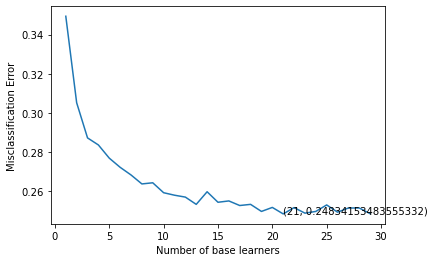

In [44]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 
optimal_learners = base_ln[error.index(min(error))]
plt.plot(base_ln, error)                              
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

 - The lower numbers in the teens are deceiving and do not provide an optimal accuracy score.  The sweetspot appeared to be 30 for me.

In [45]:
# Training the best model and calculating accuracy on test data
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7727686703096539

- This was the best score from my efforts to zero in on the optimal number of base learners.

In [46]:
# Creating variable for prediction data
result = clf.predict(X_test)     

[[2639  133   42]
 [ 454  371   59]
 [ 217   93  384]]
0.7727686703096539


<AxesSubplot:>

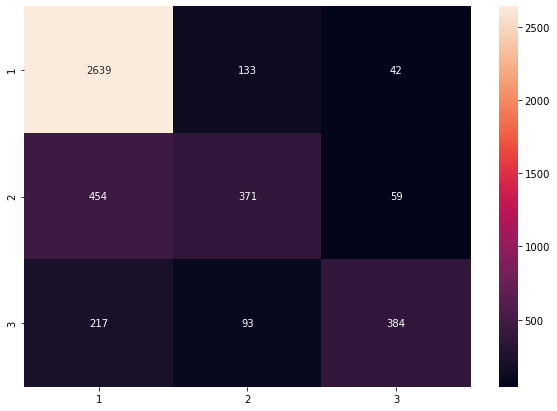

In [47]:
# Creating confusion matrix for review
conf_mat = confusion_matrix(y_test, result)
print(conf_mat)
print(metrics.f1_score(y_test, result,average='micro'))
df_cm = pd.DataFrame(conf_mat, index = [i for i in "123"],
                  columns = [i for i in "123"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

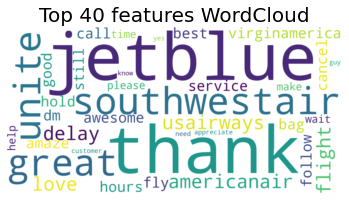

In [48]:
# Creating and printing wordcloud visualization
all_features = bow_vec.get_feature_names()              
top_features=''                                    
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=' '
    
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)

plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

- We can see that hour, thank, and jetblue are the top words within our model.

**TfidfVectorizer.**

In [49]:
# K - Fold Cross Validation
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

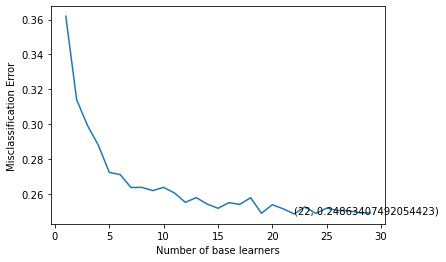

In [50]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                       
optimal_learners = base_ln[error.index(min(error))]                       
plt.plot(base_ln, error)                                                    
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

 - The lower numbers in the teens are deceiving and do not provide an optimal accuracy score.  The sweetspot appeared to be 30 for me.

In [51]:
# Training the best model and calculating error on test data
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.776183970856102

- This was the best score from my efforts to zero in on the optimal number of base learners.

In [52]:
# Creating variable for prediction data
result = clf.predict(X_test)

[[2646  122   46]
 [ 444  378   62]
 [ 217   92  385]]
0.7761839708561019


<AxesSubplot:>

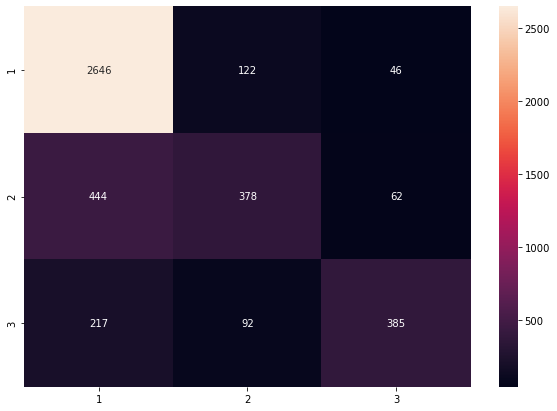

In [53]:
# Creating confusion matrix for review
result =  clf.predict(X_test)
conf_mat = confusion_matrix(y_test, result)
print(conf_mat)
print(metrics.f1_score(y_test, result,average='micro'))
df_cm = pd.DataFrame(conf_mat, index = [i for i in "123"],
                  columns = [i for i in "123"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

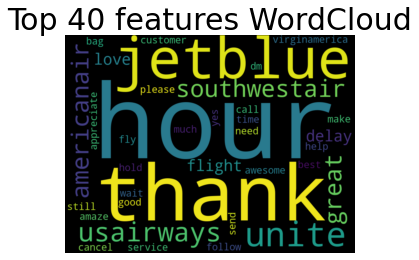

In [54]:
# Creating and printing wordcloud visualization
all_features = vectorizer.get_feature_names()                                
Top_features=''                                                          
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    Top_features+=all_features[i]
    Top_features+=' '
      
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="Black",width=1000, 
                          height=750).generate(Top_features)

plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(30, 30), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=30)
plt.axis("off")
plt.show()

- We can see that hour, thank, and jetblue are the top words within our model.

## <a id = "link7"></a>7. Conclusion - Summary from the understanding of the application of Various Pre-processing, Vectorization, and performance of the model on the dataset.  (6 marks)

### **Summary**:

- We utilized a dataset which reviews the airline_sentiment and text on a scale of 0-2 with negative being zero, neutral being 1, and positive being 2.
- We identified the missing data fields but did not remedy because those fields were to be deleted.
- We visualized four plots for distribution of all tweets amoung airlines, distribution of all the negative reasons, distribution of sentiment of tweets for each airline, and distribution of negatives reasons.
- We provided both a positive and negative wordcloud to represent the highest word counts within the dataset.
- We pre-processed the data to remove html tags, tokenize words, remove numbers, remove special characters, remove stop words, convert lowercase, Lemmatized words to root format, and joined all for a clean view individual words in text.
- We vectorized the text data with CountVectorizer and TfidfVectorizer and fine tuned the parameters which improved accuracy.  The printed the wordcloud and confusion matrix for visual representation.
- Lessons learned: TfidfVectorizer produces better accuracy than CountVectorizer and this is a considering factor when building a model.  While the word count appears near identical the accuracy should be improved at every opportunity.  I did not see any indication of overfitting so I feel comfortable using this model for production.

## <a id = "link8"></a> 8. Overall Structure and flow of Notebook - Structure and flow well commented code. (4 marks)